In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import json
import tqdm
import os
from collections import defaultdict

from utils import (
    save_side_by_side_visualization,
    convert_coco_to_masklet_format,
)

Converting 5000 RGB samples to LAB color space...
Conversion to LAB complete.
Fitting KMeans with 128 clusters on 5000 samples...
KMeans fitting complete.


### Load ground truth and predictions

In [2]:
IMAGE_ROOT = '/checkpoint/sam3/shared/data/metaclip_merged/'
PREDICTION_THRESHOLD = 0.5
NUM_VISUALIZATIONS = 20

# _a_ is one of 3 annotators
gt_path = '../assets/gold_image_eval/gold_attributes_merged_a_test.json'
predictions_path = '../assets/sam3_predictions_gold_image/coco_predictions_gold_attr.json'

# Load ground truth
with open(gt_path, 'r') as f:
    gt_data = json.load(f)

# Load predictions
with open(predictions_path, 'r') as f:
    predictions = json.load(f)

gt_annotations = gt_data['annotations']
images = gt_data['images']
print(f"Number of GT annotations: {len(gt_annotations)}")
print(f"Number of images: {len(images)}")
print(f"Number of predictions: {len(predictions)}")


image_dict = {img['id']: img for img in images}

# Group GT annotations by image_id
gt_by_image = defaultdict(list)
for ann in gt_annotations:
    image_id = ann['image_id']
    if image_id not in gt_by_image:
        gt_by_image[image_id] = []
    gt_by_image[image_id].append(ann)

# Group predictions by image_id
pred_by_image = {}
for pred in predictions:
    image_id = pred['image_id']
    if image_id not in pred_by_image:
        pred_by_image[image_id] = []
    pred_by_image[image_id].append(pred)

Number of GT annotations: 4796
Number of images: 11687
Number of predictions: 16854


### Plot ground truth (left) and predictions (right)

  0%|          | 0/20 [00:00<?, ?it/s]

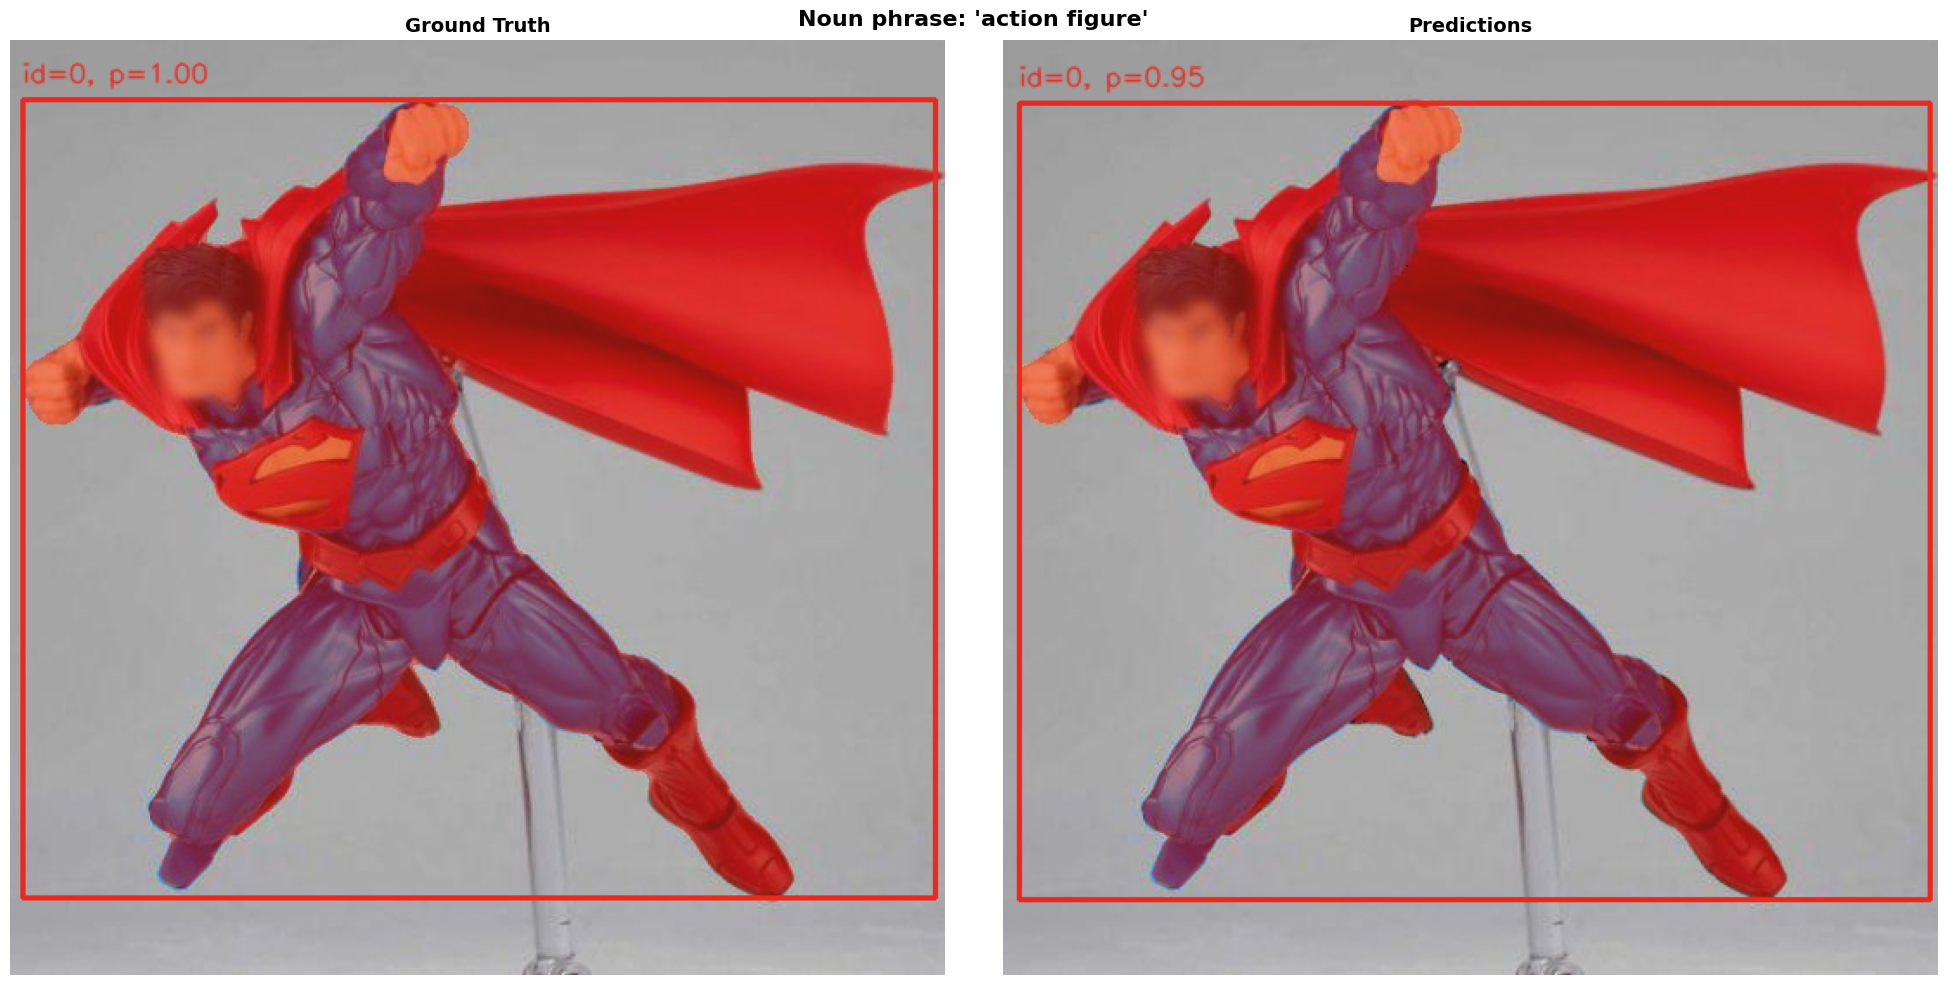

  5%|▌         | 1/20 [00:00<00:13,  1.45it/s]

No ground truth annotations for image_id 330000001, skipping.
No ground truth annotations for image_id 330000002, skipping.
No ground truth annotations for image_id 330000003, skipping.
No ground truth annotations for image_id 330000006, skipping.
No ground truth annotations for image_id 330000007, skipping.
No ground truth annotations for image_id 650000000, skipping.
No ground truth annotations for image_id 650000001, skipping.
No ground truth annotations for image_id 650000002, skipping.
No ground truth annotations for image_id 650000003, skipping.


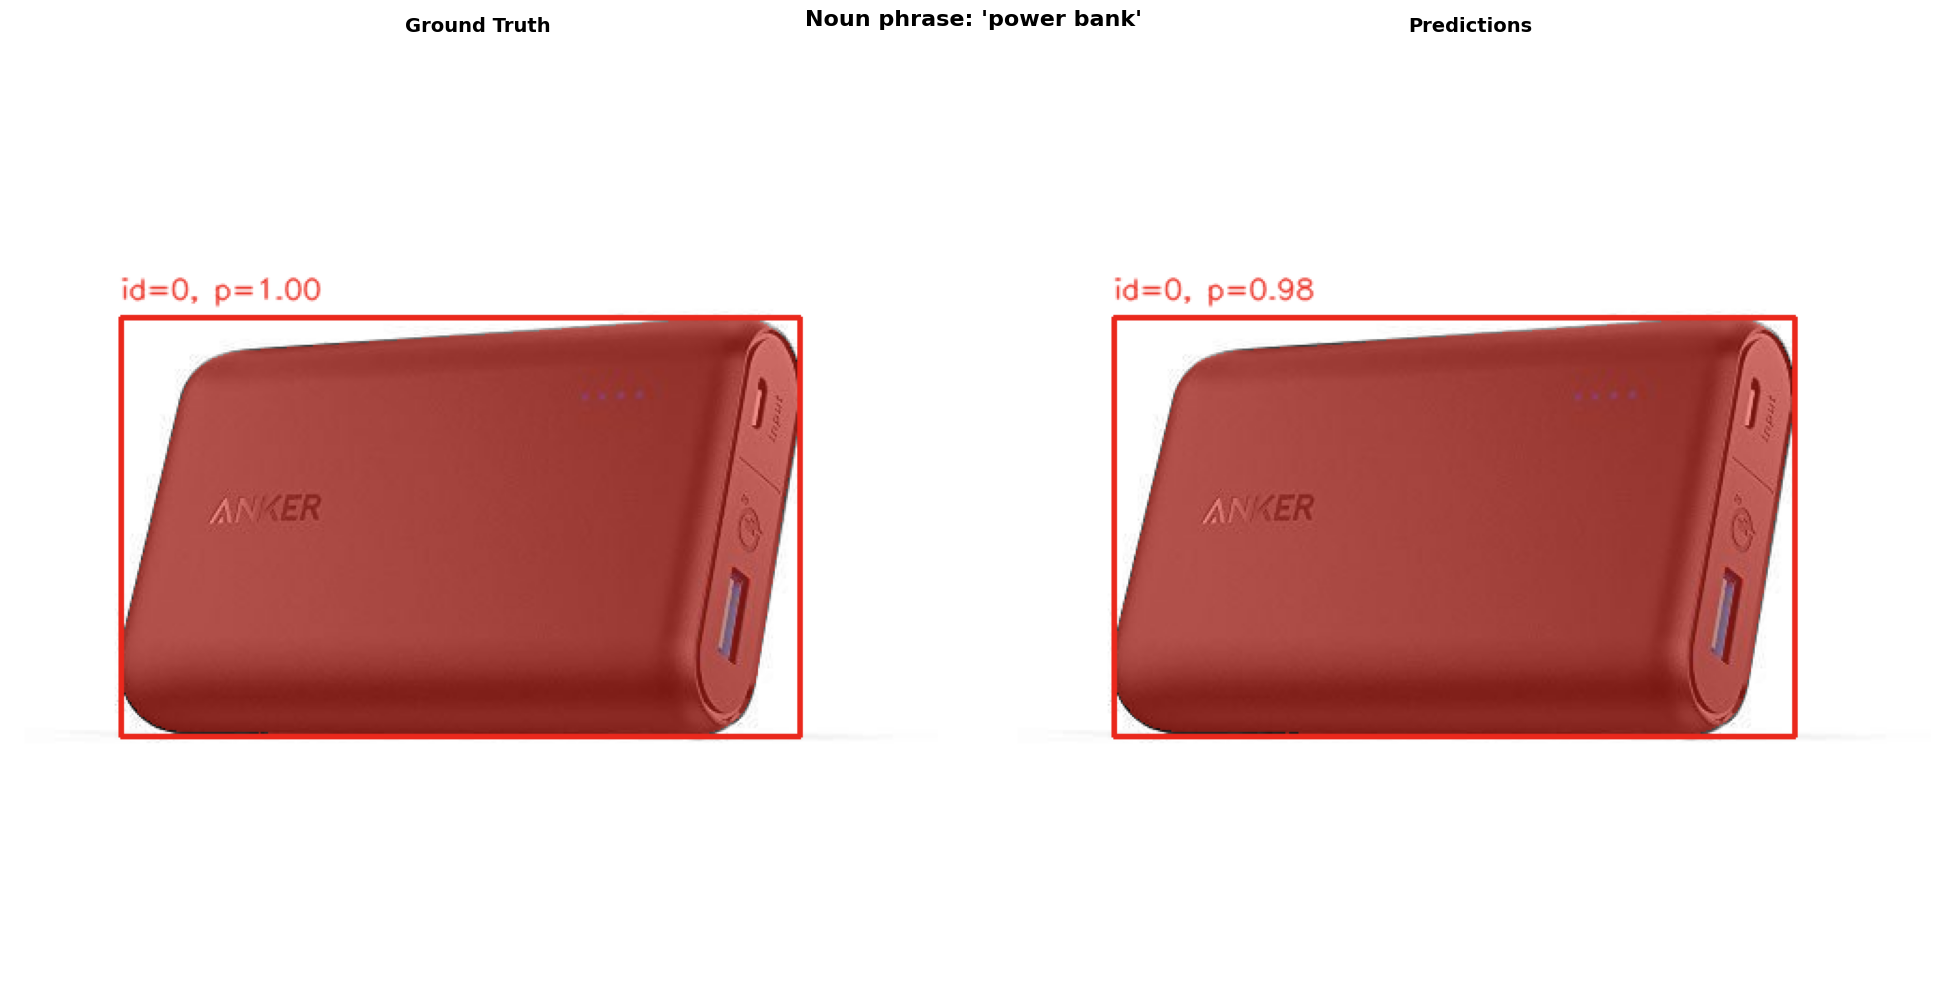

 55%|█████▌    | 11/20 [00:01<00:00, 12.11it/s]

No ground truth annotations for image_id 1610000000, skipping.


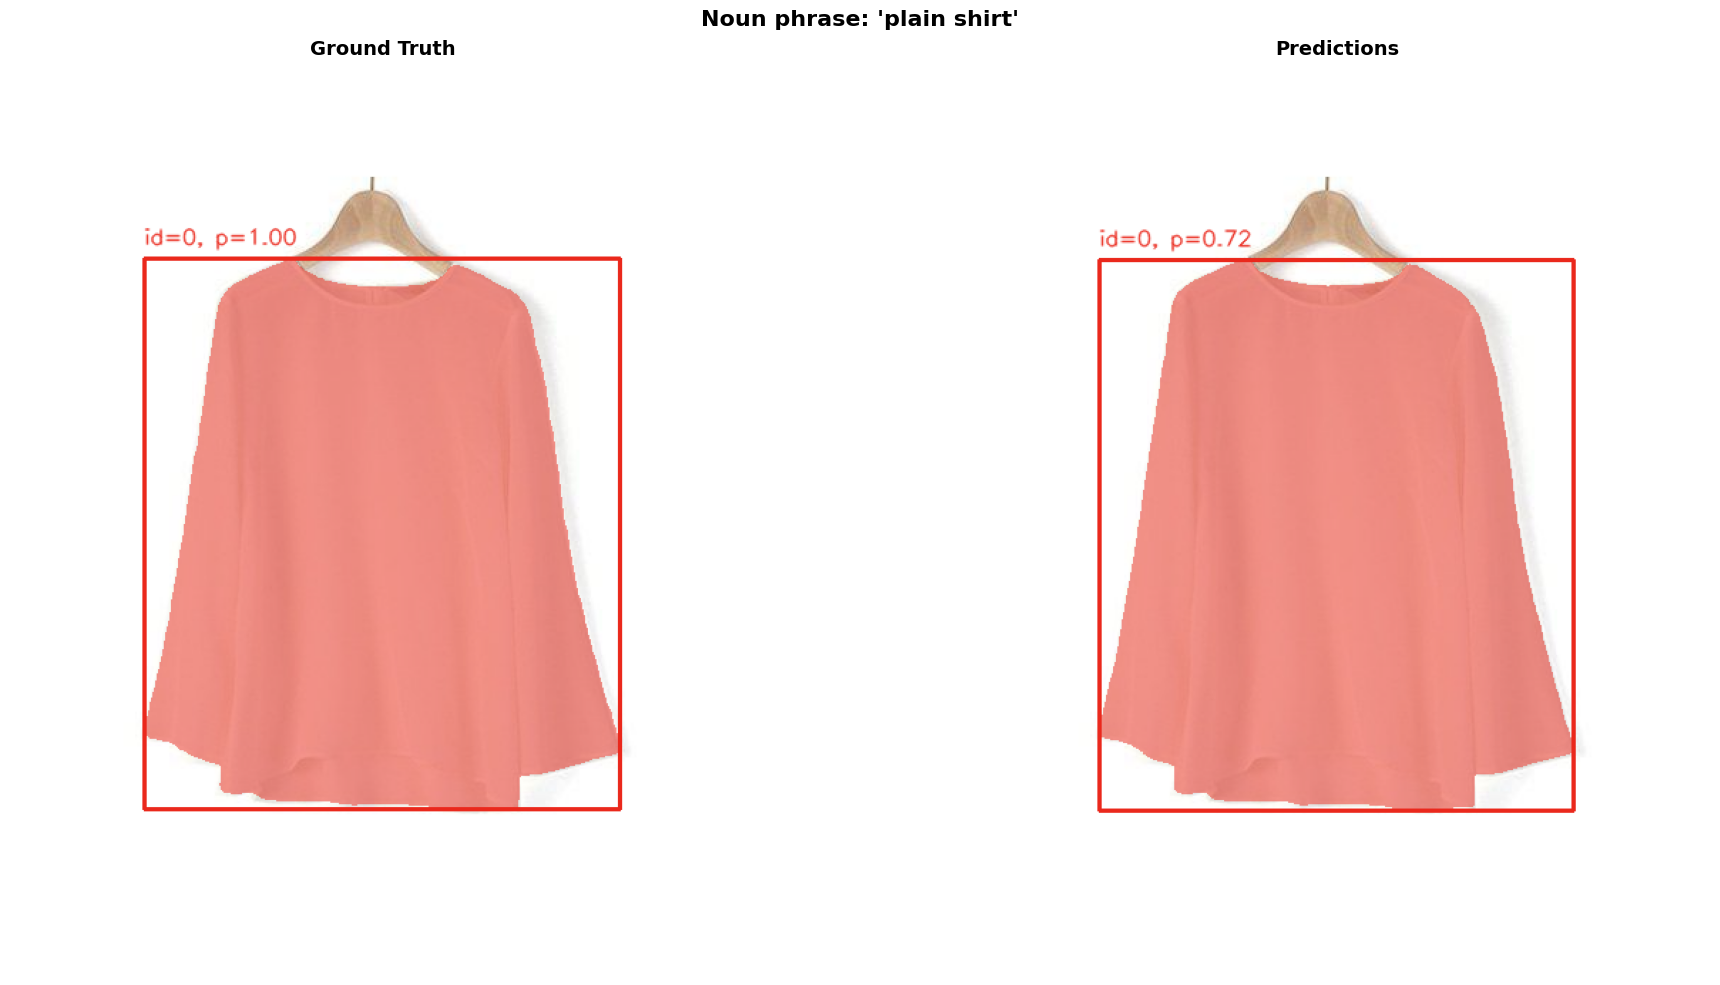

 65%|██████▌   | 13/20 [00:01<00:00,  8.88it/s]

No ground truth annotations for image_id 1610000002, skipping.


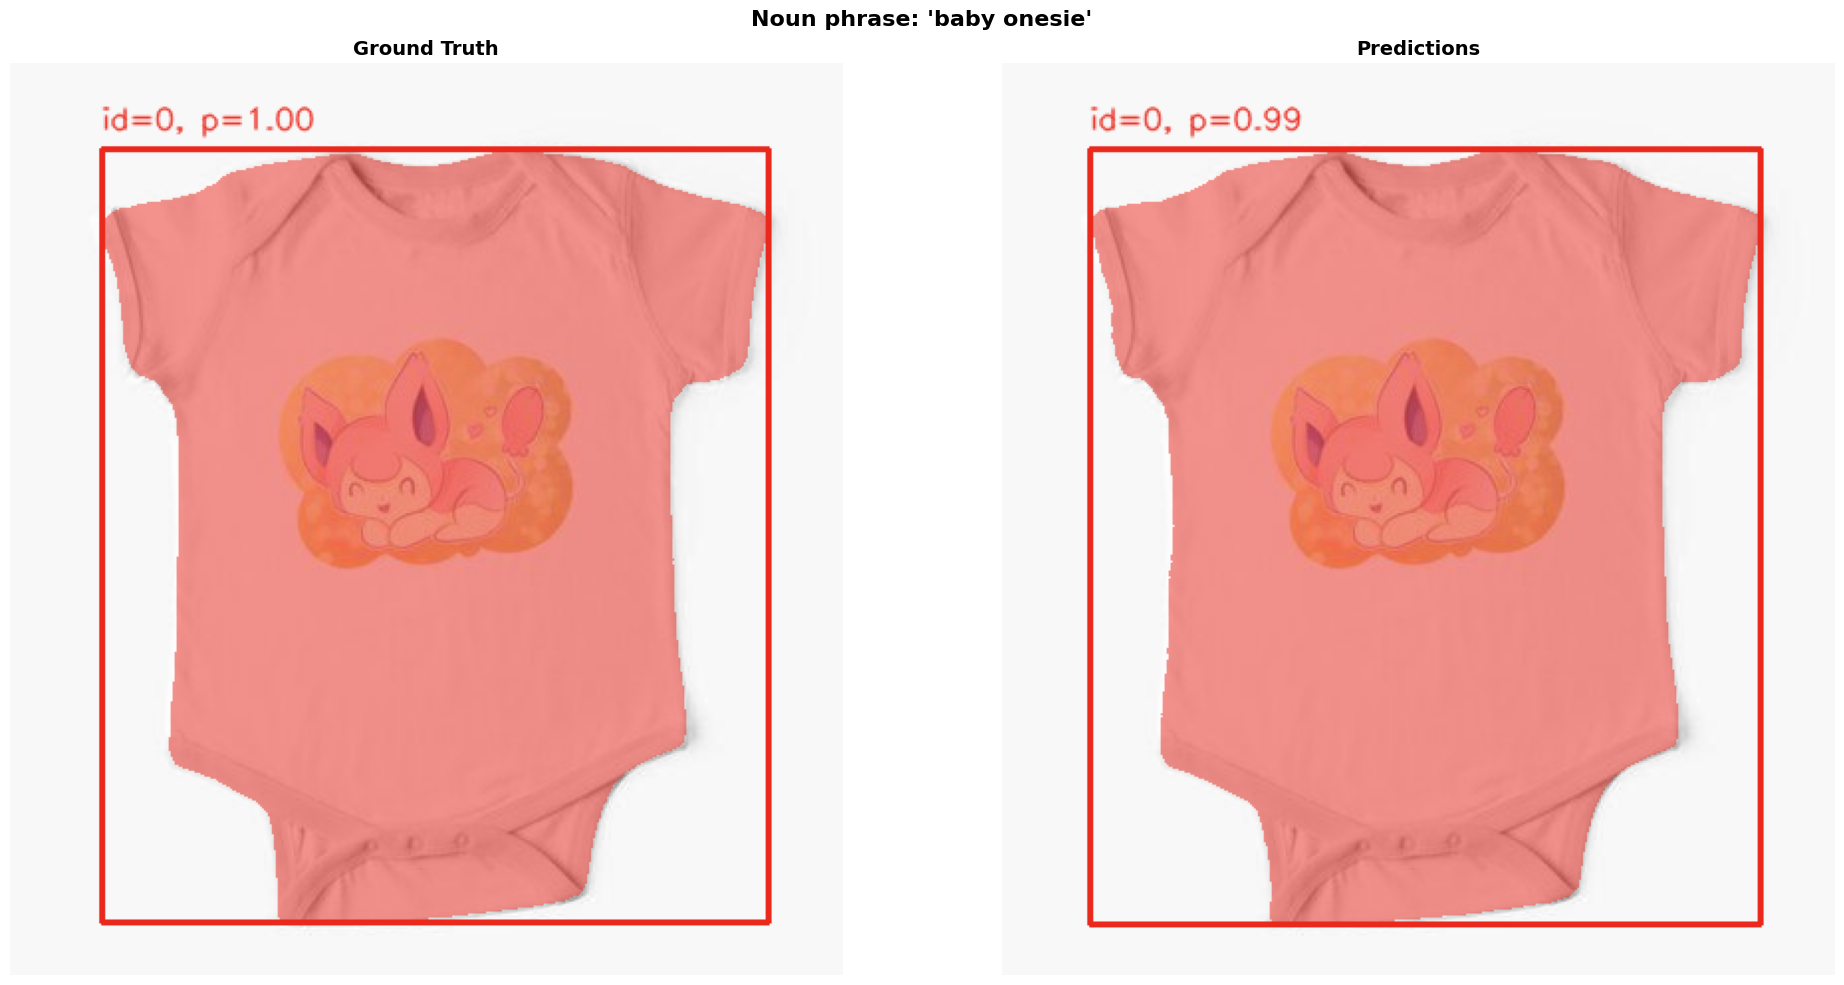

 75%|███████▌  | 15/20 [00:02<00:00,  6.88it/s]

No ground truth annotations for image_id 2250000002, skipping.


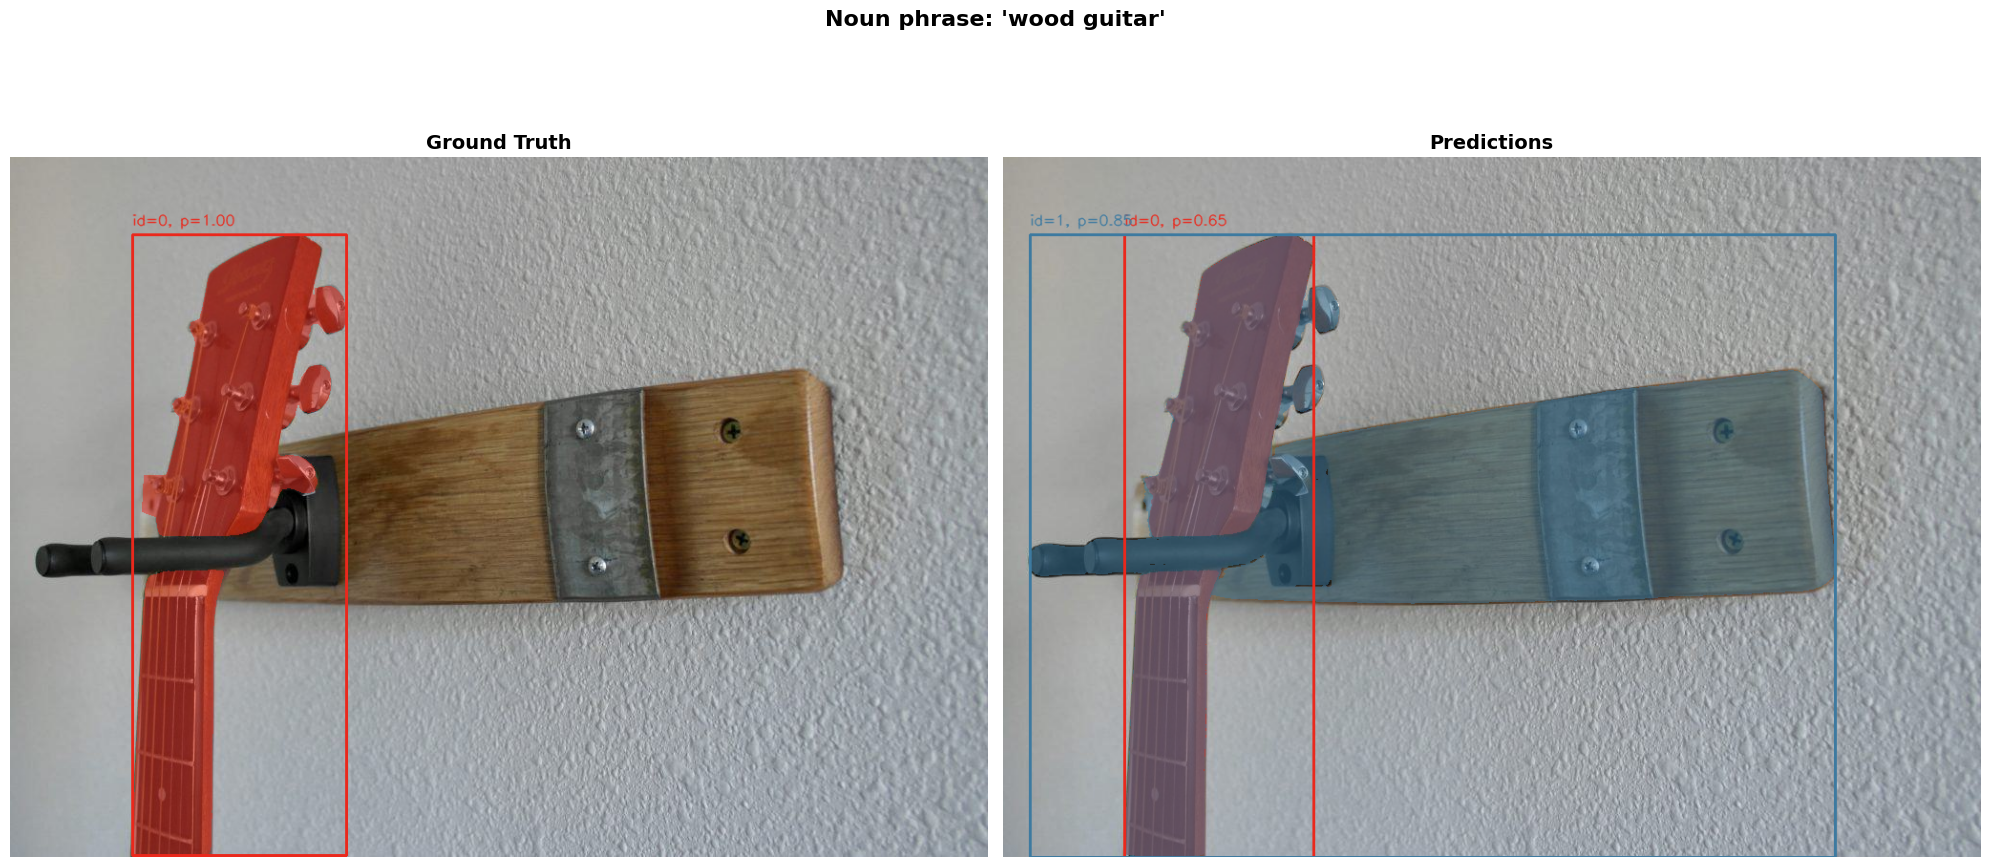

100%|██████████| 20/20 [00:03<00:00,  6.57it/s]

No ground truth annotations for image_id 2890000000, skipping.
No ground truth annotations for image_id 2890000002, skipping.
No ground truth annotations for image_id 2890000003, skipping.


In [3]:
image_ids_to_process = list(pred_by_image.keys())[:NUM_VISUALIZATIONS]

for idx, image_id in enumerate(tqdm.tqdm(list(image_ids_to_process))):
    img_info = image_dict[image_id]
    gt_anns = gt_by_image[image_id]

    if not gt_anns: #TODO: fix this
        print(f"No ground truth annotations for image_id {image_id}, skipping.")
        continue

    pred_anns = pred_by_image[image_id]

    image_path = os.path.join(IMAGE_ROOT, img_info["file_name"])

    # Load original image as numpy array
    img = np.array(Image.open(image_path))
    if img.shape[-1] == 4:  # Remove alpha channel if present
        img = img[..., :3]

    pred_anns = [p for p in pred_anns if p.get('score', 0) >= PREDICTION_THRESHOLD]

    gt_conveted = convert_coco_to_masklet_format(gt_anns, img_info, is_prediction=False)
    pred_converted = convert_coco_to_masklet_format(pred_anns, img_info, is_prediction=True)

    noun_phrase = img_info['text_input']

    save_side_by_side_visualization(img, gt_conveted, pred_converted, noun_phrase)
    plt.show()
    plt.close()
